In [2]:
## Generally setup
import numpy as np
import os
import os.path as op
import matplotlib.pyplot as plt
from langouEEG import *
from scipy.stats import *
from eeg_microstates3 import *
import pandas as pd
import time
import mne
import pickle
from mne.datasets import sample
from mne.datasets import fetch_fsaverage
from mpl_toolkits.mplot3d import Axes3D  # noqa
from langouMicrostates import *
from IPython.display import clear_output as clear
import logging
# import easyEEG

sample_data_folder = mne.datasets.sample.data_path()
# dataRoot = "/data/home/viscent/Light"
dataRoot = "/work/zhangyq/Light/"


# Download fsaverage files
fs_dir = fetch_fsaverage(verbose=True)
isMale = False
isAll = True
isBlind = False
if not isAll:
    result_dir = op.join(dataRoot,'result','male' if isMale else 'female')
else:
    result_dir = op.join(dataRoot,'result','all')
if isBlind:
    result_dir = op.join(result_dir,'Blind')
subjects_dir = op.dirname(fs_dir)
if not op.exists(result_dir):
    os.mkdir(result_dir)
# The files live in:
subject = 'fsaverage'
trans = 'fsaverage'  # MNE has a built-in fsaverage transformation
src = op.join(fs_dir, 'bem', 'fsaverage-ico-5-src.fif')
bem = op.join(fs_dir, 'bem', 'fsaverage-5120-5120-5120-bem-sol.fif')
print(__doc__)

0 files missing from root.txt in /work/zhangyq/mne_data/MNE-fsaverage-data
0 files missing from bem.txt in /work/zhangyq/mne_data/MNE-fsaverage-data/fsaverage
Automatically created module for IPython interactive environment


In [3]:
%%capture
## Input EEG data and extarct epochs

epochs_4F = dict()
epochs_RF = dict()
epochs_4R = dict()
epochs_RR = dict()

tmin_rest, tmax_rest, tmin_flick,tmax_flick = 40, 60, 15, 30
tmin_R_flick, tmax_R_flick = 20, 25

for subject_name in range(1,21):
    
    if not isAll:
        if not (isMale ^ (subject_name in [7,8,11,17])):
            continue
    if subject_name<10:
        subject_name='S0'+str(subject_name)
    else:
        subject_name='S'+str(subject_name)
    with open(dataRoot+'/clean_data_av/'+subject_name+'_clean.lgeeg','rb') as f:
        raw=pickle.load(f)
    events, event_dict=extractEvents(raw)
    picks = mne.pick_types(raw.info, meg=False, eeg=True, stim=False, eog=False,
                        exclude='bads')
    if isBlind:
        epoch_RR,epoch_RF,epoch_4R,epoch_4F = extractEpochsBlind(raw,events,picks, 
        tmin_rest = 60,tmax_rest = 87,tmin_flick = 3,tmax_flick = 30)
    else:
        epoch_RR,epoch_RF,epoch_4R,epoch_4F = extractEpochs_id(raw,events,picks, 
        tmin_rest = tmin_rest,tmax_rest = tmax_rest,tmin_flick = tmin_flick,tmax_flick = tmax_flick)
        _,epoch_RF,_,_ = extractEpochs_id(raw,events,picks, 
        tmin_rest = tmin_rest,tmax_rest = tmax_rest,tmin_flick = tmin_R_flick,tmax_flick = tmax_R_flick)
    epochs_4F[subject_name]=epoch_4F
    epochs_RF[subject_name]=epoch_RF
    epochs_RR[subject_name]=epoch_RR
    epochs_4R[subject_name]=epoch_4R
    if not op.exists(os.path.join(dataRoot,'fwd_solution.lgeeg')):
        fwd = mne.make_forward_solution(raw.info, trans=trans, src=src,
                                        bem=bem, eeg=True, mindist=5.0, n_jobs=1)
        print(fwd)
        mne.write_forward_solution(os.path.join(dataRoot,'fwd_solution.lgeeg'),fwd,overwrite=True)
    else:
        fwd = mne.read_forward_solution(os.path.join(dataRoot,'fwd_solution.lgeeg'))
    data_path = sample.data_path()

    picks = mne.pick_types(raw.info, meg=False, eeg=True, stim=False, eog=False,
                        exclude='bads')
    # Clear output display
    clear()

## Concact epochs
epoch_4F = mne.concatenate_epochs(list(epochs_4F.values()))
epoch_RF = mne.concatenate_epochs(list(epochs_RF.values()))
epoch_4R = mne.concatenate_epochs(list(epochs_4R.values()))
# mne.epochs.equalize_epoch_counts([epoch_4F, epoch_RF, epoch_RR])

# Clear output display
clear()

In [5]:
result_dir = dataRoot + "/result/microstates"
tm = time.strftime("%Y_%m_%d_%H_%M_%S", time.localtime())
time_augs=[['min_rest','max_rest','min_flick','max_flick','min_random_flick','max_random_flick']
,[tmin_rest, tmax_rest, tmin_flick, tmax_flick, tmin_R_flick, tmax_R_flick]]
to_save_cache = False
save_log=False

In [1]:
vars_4R = display_maps(epoch_4R, n_maps=20, save=True, dpi=600, filename='40Hz_rest',
fmt='.png', to_save_cache=to_save_cache, time_augs=time_augs, tm=tm, result_dir=result_dir,
calc_lzc=True, epochs=epochs_4R,save_log=save_log)

NameError: name 'display_maps' is not defined

(765102, 64)


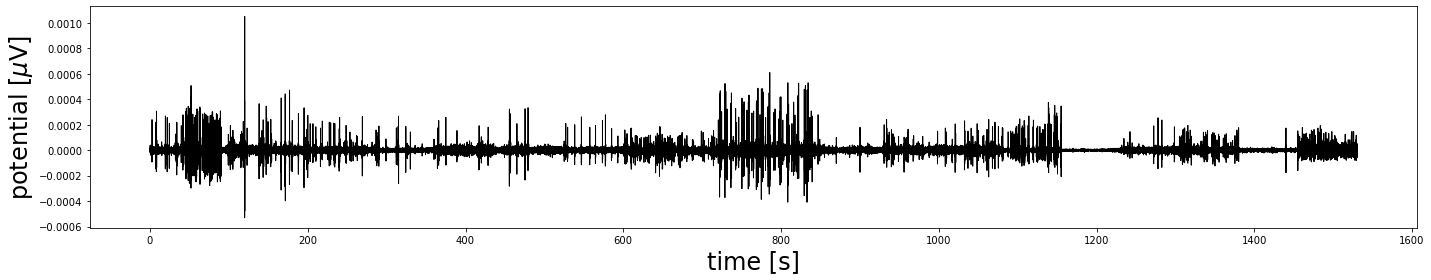

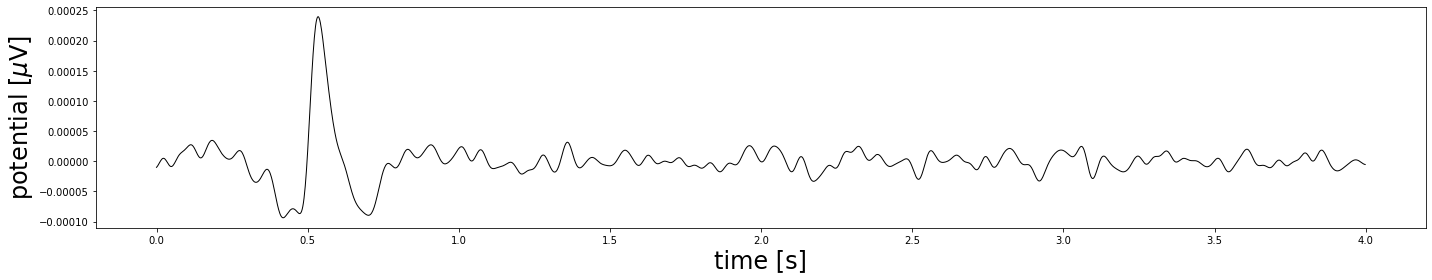

Clustering algorithm: kmeans
[+] Data format for clustering [GFP peaks, channels]: 29405 x 64

[+] Clustering algorithm: mod. K-MEANS.
	K-means run 1/5 converged after 19 iterations.
	K-means run 2/5 converged after 50 iterations.
	K-means run 3/5 converged after 59 iterations.
	K-means run 4/5 converged after 58 iterations.
	K-means run 5/5 converged after 25 iterations.
[+] Computation time: 12.21 sec

[+] Microstate back-fitting:
data_norm:  (765102, 64)
data_cluster_norm:  (29405, 64)
maps:  (4, 64)

[+] Global explained variance GEV = 0.738
GEV_0: 0.043
GEV_1: 0.058
GEV_2: 0.579
GEV_3: 0.058

Empirical symbol distribution (RTT):

p_0 = 0.279
p_1 = 0.202
p_2 = 0.237
p_3 = 0.282

Empirical transition matrix:

|0.9080.0340.0170.041|
|0.0450.8900.0240.041|
|0.0230.0190.9380.020|
|0.0400.0290.0180.913|

GFP peaks per sec.: 19.22

Global explained variance (GEV) per map:
GEV(ms-0) = 0.04
GEV(ms-1) = 0.06
GEV(ms-2) = 0.58
GEV(ms-3) = 0.06

total GEV: 0.738

Empirical entropy H = 1.38 (ma

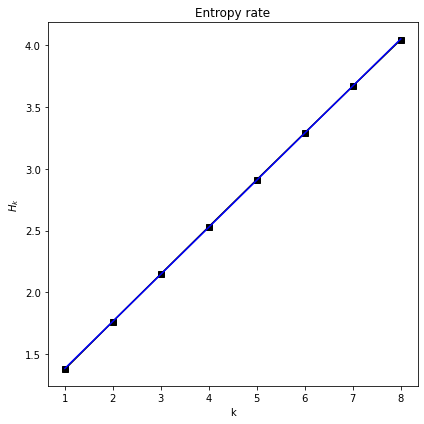


Empirical entropy rate h = 0.38
Theoretical MC entropy rate h = 0.39
The lzc:
(21,)
[2270, 2477, 2677, 2621, 2736, 2804, 2798, 2673, 2318, 2364, 2381, 2677, 2456, 2641, 2244, 2313, 2712, 2465, 2623, 2701, 1]


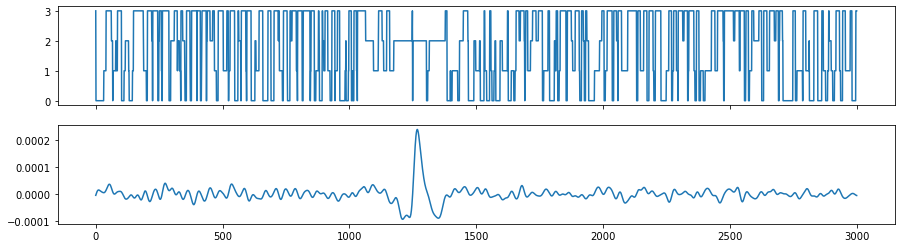

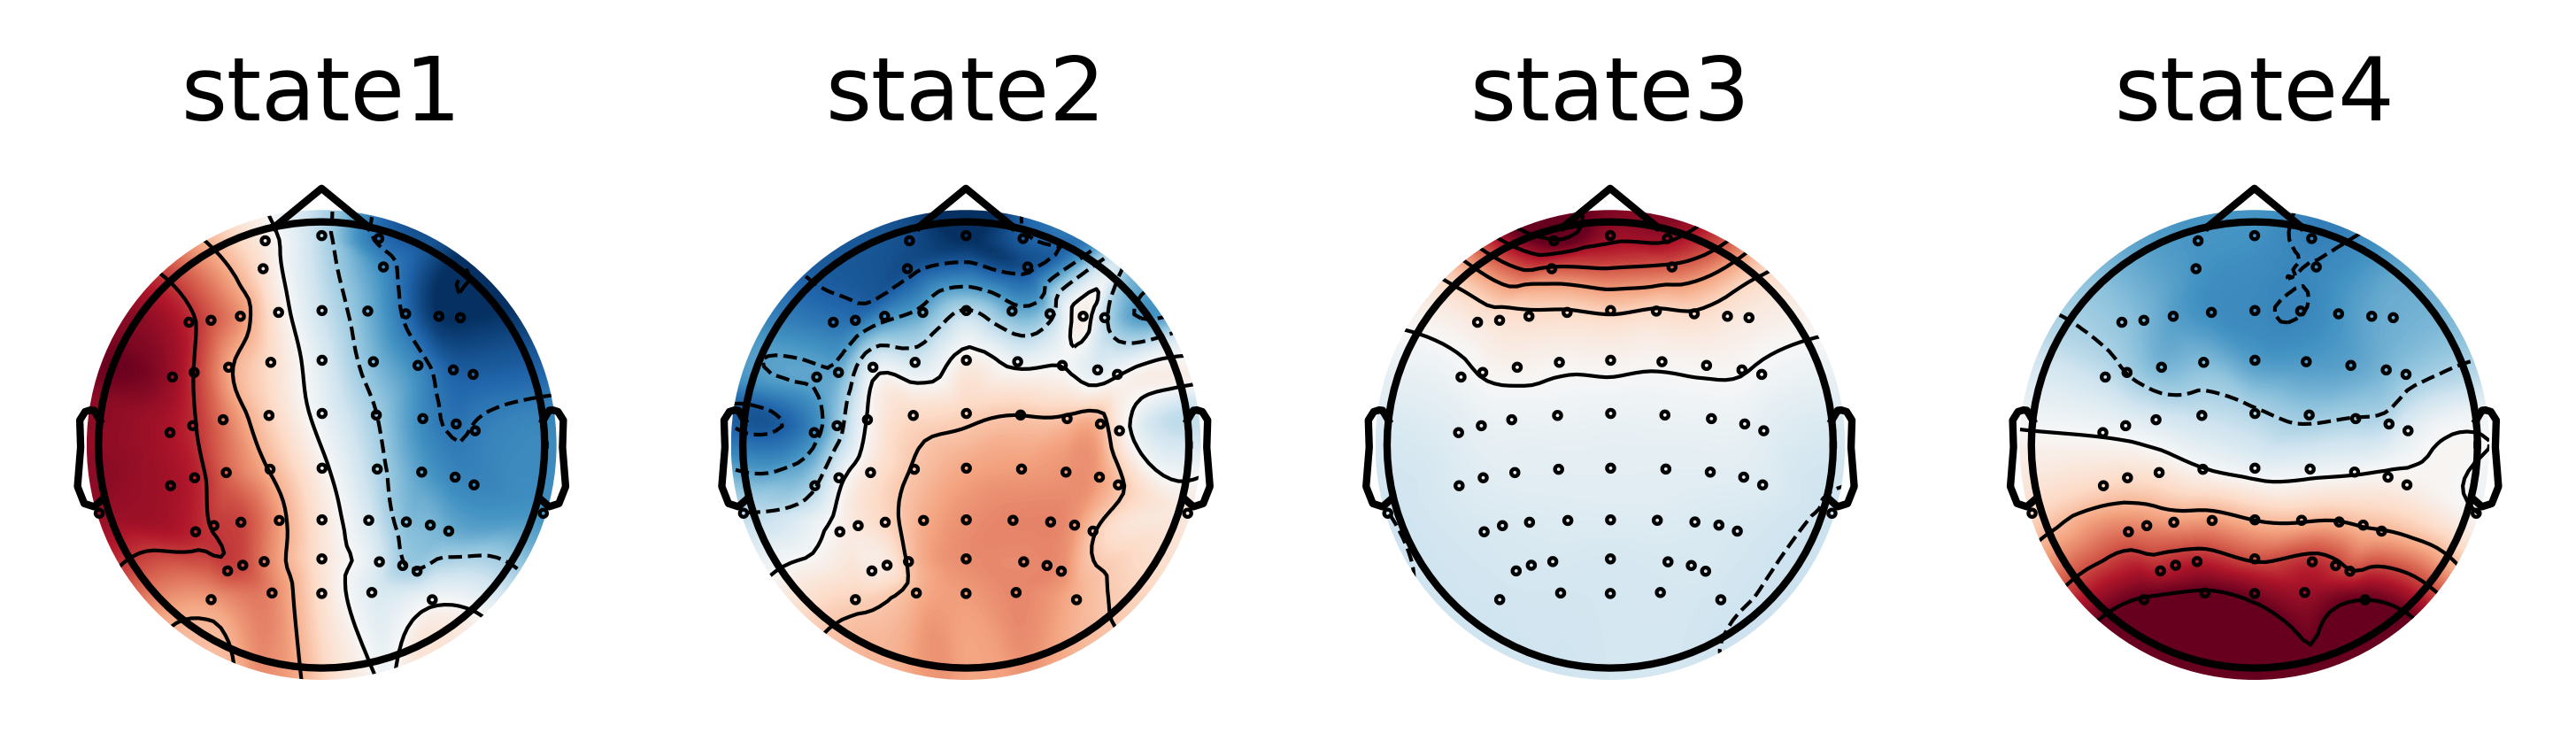

In [7]:
vars_4F = display_maps(epoch_4F, n_maps=4, save=True, dpi=600, filename='40Hz_flicker', 
fmt='.png', to_save_cache=to_save_cache, time_augs=time_augs, tm=tm, result_dir=result_dir,
calc_lzc=True, epochs=epochs_4F,save_log=save_log)

(237595, 64)


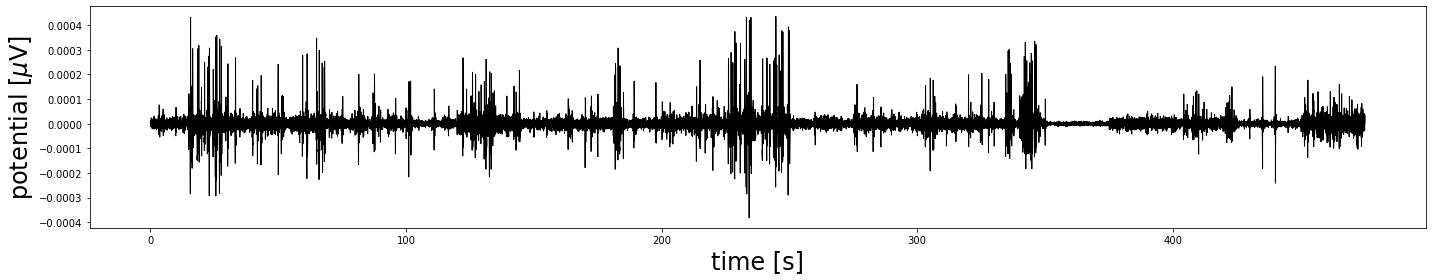

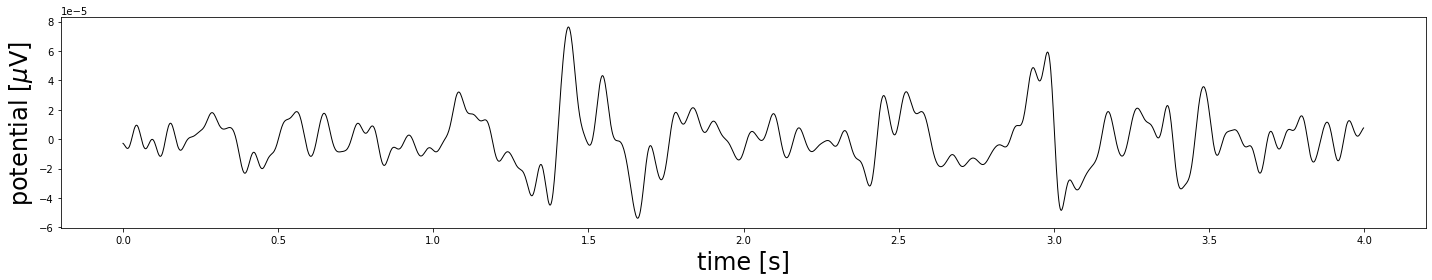

Clustering algorithm: kmeans
[+] Data format for clustering [GFP peaks, channels]: 9123 x 64

[+] Clustering algorithm: mod. K-MEANS.
	K-means run 1/5 converged after 40 iterations.
	K-means run 2/5 converged after 49 iterations.
	K-means run 3/5 converged after 42 iterations.
	K-means run 4/5 converged after 77 iterations.
	K-means run 5/5 converged after 48 iterations.
[+] Computation time: 8.93 sec

[+] Microstate back-fitting:
data_norm:  (237595, 64)
data_cluster_norm:  (9123, 64)
maps:  (8, 64)

[+] Global explained variance GEV = 0.770
GEV_0: 0.043
GEV_1: 0.029
GEV_2: 0.016
GEV_3: 0.042
GEV_4: 0.393
GEV_5: 0.136
GEV_6: 0.093
GEV_7: 0.018

Empirical symbol distribution (RTT):

p_0 = 0.250
p_1 = 0.206
p_2 = 0.098
p_3 = 0.176
p_4 = 0.222
p_5 = 0.012
p_6 = 0.010
p_7 = 0.025

Empirical transition matrix:

|0.9110.0260.0160.0230.0170.0010.0010.006|
|0.0320.8970.0160.0350.0130.0010.0010.004|
|0.0410.0340.8680.0250.0190.0010.0010.010|
|0.0330.0390.0140.8870.0200.0010.0010.004|
|0.0180.0

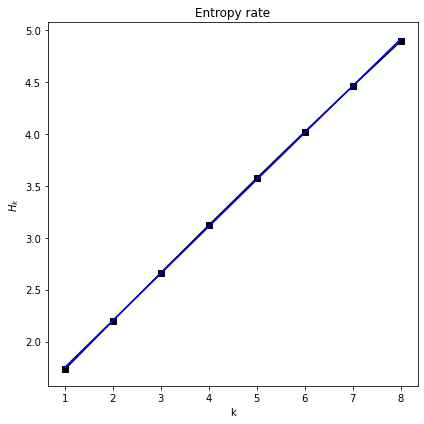


Empirical entropy rate h = 0.45
Theoretical MC entropy rate h = 0.47
The lzc:
(21,)
[1102, 1073, 1091, 1120, 1127, 1087, 1245, 1139, 1059, 941, 1034, 1107, 1125, 1279, 925, 1111, 1259, 1071, 1208, 1197, 5]


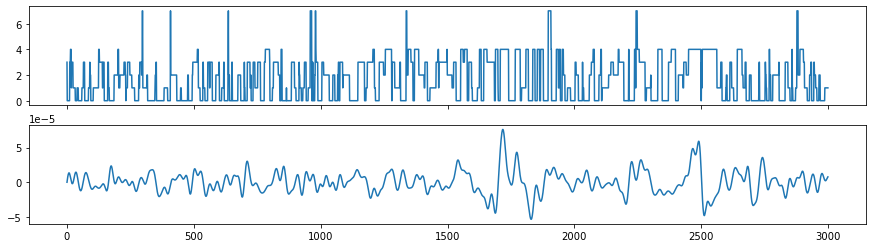

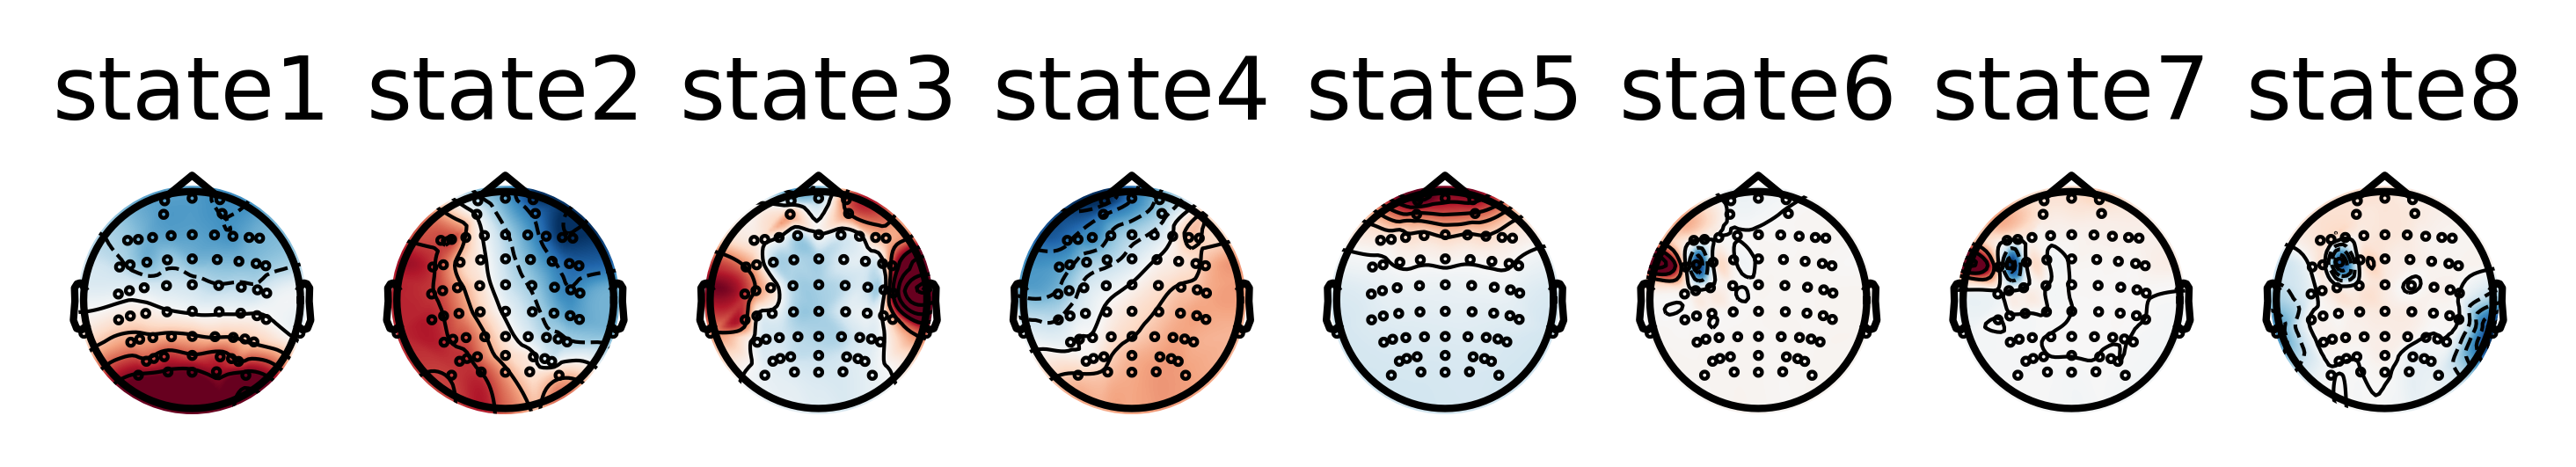

In [9]:
vars_RF = display_maps(epoch_RF, n_maps=8, save=True, dpi=600, filename='random_flicker', 
fmt='.png', to_save_cache=to_save_cache, time_augs=time_augs, tm=tm, result_dir=result_dir,
calc_lzc=True, epochs=epochs_RF,save_log=save_log)